## [ 사용자, 권한, 롤 관리 ]
---
### [ 1. 사용자 관리 ]
#### (1) 사용자란?
- `사용자(USER)` : 오라클 데이터베이스에서 데이터베이스에 접속하여 데이터를 관리하는 계정

> < 사용자 관리가 필요한 이유 >  
> 데이터를 활용한 서비스 규모가 크거나 작은 규모의 여러 서비스를 통합한 방식 등  
> 실문에서 사용하는 여러 종류의 서비스는 한 사용자가 관리하기에는 데이터 분량이 너무 방대하거나 구조가 복잡하다.  
> 따라서 업무 분할과 효율, 보안을 고려하여 업무에 따라 여러 사용자들을 나눈다.  
>  
> 오라클 데이터베이스는 테이블/인덱스/뷰 등 여러 객체가 사용자별로 생성되므로  
> 업무별 사용자를 생성한 후에 각 사용자 업무에 맞는 데이터 구조를 만들어 관리하는 방식을 사용할 수 있다.  
> 반대로 대표 사용자를 통해 업무에 맞는 데이터 구조를 먼저 정의한 뒤에 사용할 수 있는 데이터 영역을 각 사용자에게 지정할 수 있다.

#### (2) 데이터베이스 스키마란?
- `스키마(SCHEMA)` :
    - 데이터 간 관계, 데이터 구조, 제약 조건 등 데이터를 저장 및 관리하기 위해 정의한 데이터베이스 구조의 범위
    - 오라클 데이터베이스에서는 `스키마`와 `사용자`를 구별하지 않고 사용하기도 한다.
        - `사용자` : 데이터를 사용 및 관리하기 위해 오라클 데이터베이스에 접속하는 객체
        - `스키마` : 오라클 데이터베이스에 접속한 사용자와 연결된 객체
        - ex) 사용자=SCOTT, SCOTT의 스키마=테이블/뷰/제약조건/인덱스/시퀀스/동의어 등 데이터베이스에서 SCOTT 계정으로 만든 모든 객체
        
#### (3) 사용자 생성
- 오라클 사용자를 생성할 때는 `CREATE USER`문을 사용한다.


- 기본형식 :
```SQL
CREATE USER 사용자 이름(필수)
IDENTIFIED BY 패스워드(필수)
DEFAULT TABLESPACE 테이블 스페이스 이름(선택)
TEMPORARY TABLESPACE 테이블 스페이스(그룹) 이름(선택)
QUOTA 테이블 스페이스크기 ON 테이블 스페이스 이름(선택)
PROFILE 프로파일 이름(선택)
PASSWORD EXPIRE(선택)
ACCOUNT [LOCK/UNLOCK](선택);
```

#### (3-1) 사용자 생성하기
- SCOTT 계정은 사용자를 생성할 권한이 없기 때문에 다음과 같이 생성하지 못한다.

In [ ]:
--- 15-1 SCOTT 계정으로 사용자 생성하기

CREATE USER ORCLSTUDY
IDENTIFIED BY ORACLE;

결과 :
<img width="250" alt="1-3-1(1)" src="https://user-images.githubusercontent.com/53929665/95090919-cc410480-0760-11eb-8e34-32847df3f47b.PNG">

- 사용자 생성은 일반적으로 데이터베이스 관리 권한을 가진 사용자가 권한을 가지고 있다.
- 즉, 오라클 데이터베이스를 설치할 때 자동으로 생성된 `SYS`, `SYSTEM`이 데이터베이스 관리 권한을 가진 사용자이다.
- 따라서, 다음과 같이 `SYSTEM`사용자는 사용자를 생성할 수 있다.


<img width="550" alt="1-3-1(2)" src="https://user-images.githubusercontent.com/53929665/95090923-ccd99b00-0760-11eb-9942-a01d93367e0d.PNG">

- 하지만, `CONN`을 명령어를 사용해 새로 생성한 사용자로 접속이 바로 가능하지는 않다.
- 왜냐하면, 사용자가 생성되긴 했지만 ☑(데이터 베이스 연결을 위한 권한), 즉 `CREATE SESSION`권한을 부여받지 못했기 때문이다.


<img width="550" alt="1-3-1(3)" src="https://user-images.githubusercontent.com/53929665/95090925-cd723180-0760-11eb-95d6-7b2aaa76e00d.PNG">

- 따라서, 다음같이 `GRANT`문을 이용하여 권한을 부여해야한다. 


<img width="550" alt="1-3-1(4)" src="https://user-images.githubusercontent.com/53929665/95090926-cd723180-0760-11eb-8679-fdd728d57866.PNG">

> 하지만 ORCLSTUDY 사용자가 SCOTT 계정처럼 테이블을 만들고 데이터를 사용하려면  
> 몇몇 권한이 더 필요하다.

#### (4) 사용자 정보 조회
- 사용자 또는 사용자 소유 객체 정보를 얻기 위해 다음과 같이 데이터 사전을 사용할 수 있다.

```sql
SELECT * FROM ALL_USERS
WHERE USERNAME = 'ORCLSTUDY';
```


```SQL
SELLECT * FROM DBA_USERS
WHERE USER = 'ORCLSTUDY';
```


```SQL
SELECT * FROM DBA_OBJECTS
WHERE OWNER = 'ORCLSTUDY';
```

#### (5) 오라클 사용자의 변경과 삭제
#### (5-1) 오라클 사용자 변경
- 사용자 정보를 변경할 때에는 `ALTER USER`문을 사용한다.

In [ ]:
--- 15-4
ALTER USER ORCLSTUDY
IDENTIFIED BY ORCL;

결과 :

<img width="500" alt="1-5-1(1)" src="https://user-images.githubusercontent.com/53929665/95090928-ce0ac800-0760-11eb-82e7-0b9d13c088ee.PNG">

#### (5-2) 오라클 사용자 삭제
- 사용자 정보를 삭제할 때에는 `DROP USER`문을 사용한다.

In [ ]:
--- 15-5
DROP USER ORCLSTUDY;

결과 :

<img width="500" alt="1-5-2" src="https://user-images.githubusercontent.com/53929665/95090932-ce0ac800-0760-11eb-98be-e785a253c3d3.PNG">


#### (5-3) 오라클 사용자와 객체 모두 삭제
- 사용자 스키마에 객체가 있을 경우 `CASCADE`옵션을 사용하여  
사용자와 객체를 모두 삭제할 수 있다.
```SQL
DROP USER ORCLSTUDY CASCADE;
```

---
### [ 2. 권한 관리 ]
- 데이터베이스는 접속 사용자에 따라 접근할 수 있는 데이터 영역과 권한을 지정해 줄 수 있다.
- 오라클에서는 권한을 `시스템 권한(System Privilege)`과 `객체 권한(Object Privilege)`로 분류한다.

#### (1) 시스템 권한이란?
- `시스템 권한(System Privilege)`:
    - 사용자 생성과 정보 수정 및 삭제, 데이터베이스의 접근, 오라클 데이터베이스의 여러 자원과 객체 생성 및 관리등의 권한
    - 데이터베이스 관리 권한이 있는 사용자가 부여할 수 있는 권한
    - 다음은 시스템 권한의 일부이며 `ANY` 키워드가 들어 있는 권한은 소유자에 상관없이 사용 가능한 권한을 의미한다.
    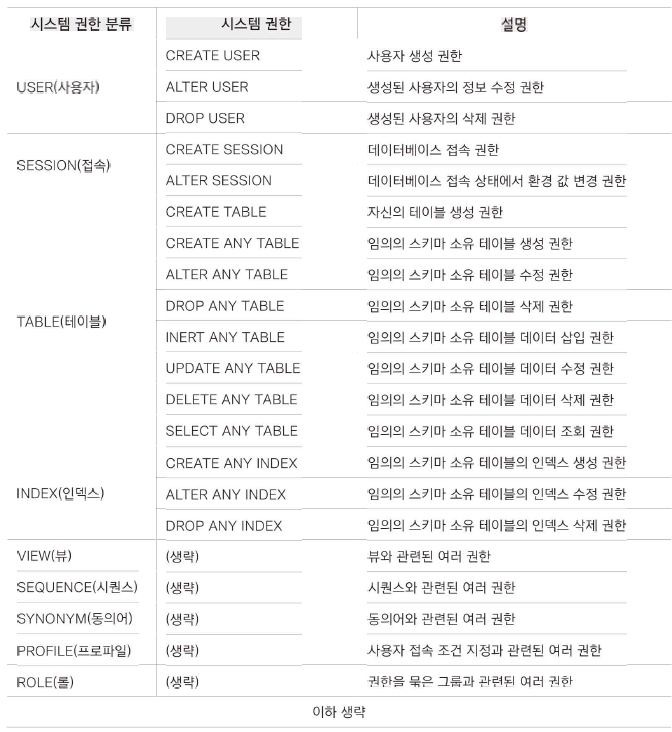

#### (2) 시스템 권한 부여
- 시스템 권한을 부여할 때 다음과 같이 `GRANT`문을 사용한다.


- 기본형식 :

```SQL
GRANT [시스템 권한] TO [사용자 이름/롤(Role)이름/PUBLIC]

[WITH ADMIN OPTION];
```
    - (필수)[시스템 권한] :
        - 오라클 데이터베이스에서 제공하는 시스템 권한을 지정
        - 한 번에 여러 종류의 권한을 부여하려면 쉼표로 구분하여 권한 이름을 여러 개 명시하면 된다.
        
        
    - (필수)[사용자 이름/롤(Role)이름/PUBLIC] :
        - 권한을 부여하려는 대상을 지정
        - 여러 사용자 또는 롤에 적용할 경우 쉼표로 구분한다.
        - PUBLIC은 현재 오라클 데이터베이스의 모든 사용자에게 권한을 부여하겠다는 의미이다.(필수)
        
        
    - (선택)[WITH ADMIN OPTION] :
        - 현재 GRANT문을 통해 부여받은 권한을 다른 사용자에게 부여할 수 있는 권한도 함께 부여받을 수 있게 한다.
        - 현재 사용자가 권한이 사라져도, 권한을 재부여한 다른 사용자의 권한은 유지된다.

#### (3) 시스템 권한 취소
- 시스템 권하의 취소는 `ROVOKE`명령어를 사용한다.


- 기본형식 :
```SQL
REVOKE [시스템 권한] FROM [사용자 이름/롤(Role)이름/PUBLIC]
```

---
#### (4) 객체 권한이란?
- `객체 권한(Object Privilege)` :
    - 특정 사용자가 생성한 테이블/인덱스/뷰/시퀀스 등과 관련된 권한이다.
        - ex) SCOTT 소유 테이블에 ORCLSTUDY 사용자가 SELECT나 INSERT등의 작업이 가능하도록 허용가능
    - 다음은 주로 사용하는 객체 권한 중 일부이다.
    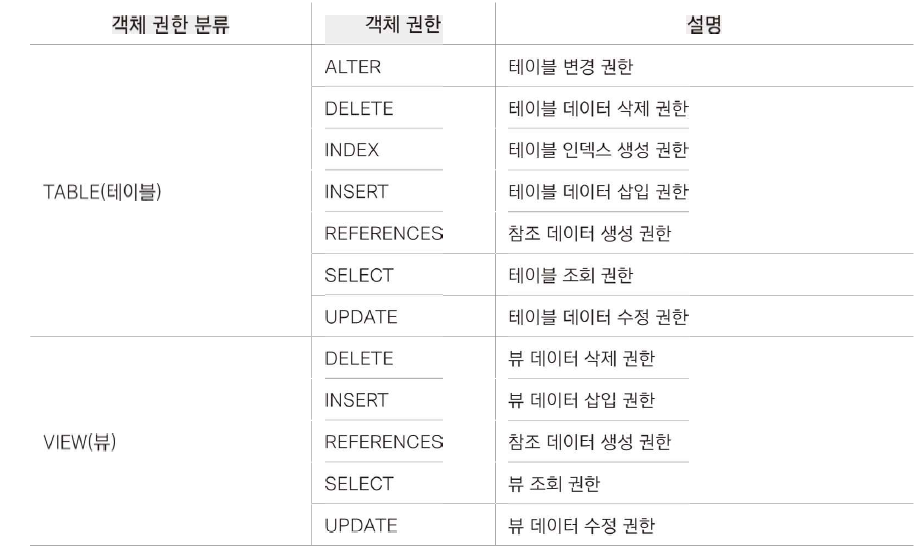


#### (5) 객체 권한 부여
- 객체 권한 부여 역시 `GRANT`문을 사용한다.


- 기본형식 :
```SQL
GRANT [객체 권한/ALL PRIVILEGES]
ON [스키마.객체  이름]
TO [사용자 이름/롤(Role)이름/PUBLIC]
[WITH GRANT OPTION];
```

- ex1) ORCLSTUDY 사용자에게 TEMP테이블 권한 부여하기


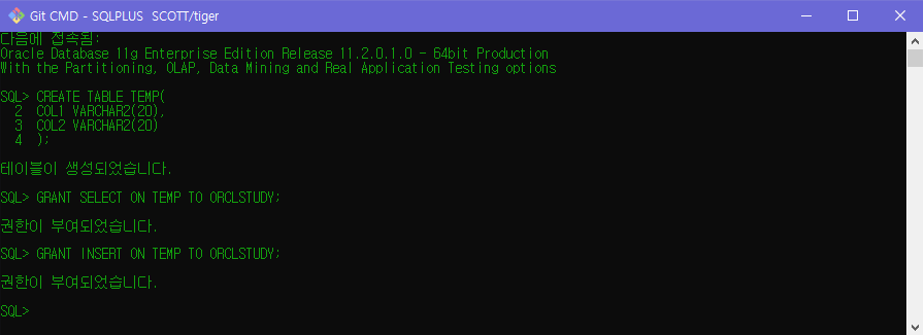


- 위처럼 따로 안하고 아래와 같이 한 번에 지정할 수 도 있다.
```SQL
GRANT SELECT, INSERT ON TEMP TO ORCLSTUDY;
```
- 위의 두 결과 모두 ORCLSTUDY 사용자의 소유는 아니지만 SCOTT 계정의 TEMP 테이블을 조회하고 INSERT가 가능해졌다.

#### (6) 객체 권한 취소
- 객체 권한의 취소도 시스템 권한과 마찬가지로 `REVOKE`문을 사용한다.
- 기본 형식 :
```SQL
REVOKE [객체 권한/ALL PRIVILEGES](필수)
ON [스키마.객체 이름](필수)
TO [사용자 이름/롤(Role)이름/PUBLIC](필수)
[CASCADE CONSTRAINTS/FORCE](선택);
```

ex) ORCLSTUDY의 TEMP테이블 객체 권한 삭제
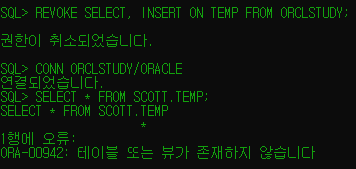

---
### [ 3. 롤 관리 ]

#### (1) 롤이란?
- ☑ 신규 생성 사용자는 아무런 권한이 없으므로 오라클 데이터베이스에서 제공하는 다양한 권한을 일일이 부여해주어야한다.  
하지만, 이러한 불편한을 개선하기 위해 `롤(Role)`을 사용한다.


- `롤(Role)` :
    - 여러 종류의 권한을 묶어 놓은 그룹을 의미한다.
    - 여러 권한을 한 번에 부여하고 해제할 수 있기에 권한 관리 효율을 높일 수 있다.
    - `사전 정의된 롤(predefined roles)`, `사용자 정의 롤(user roles)`

#### (2) 사전 정의된 롤
- 보통 새로운 사용자를 생성하면 `CONNECT`, `RESOURCE`롤을 부여하는 경우가 많다.
-  `CONNECT`롤에서  
뷰를 생성하는 `CREATE VIEW`권한과  
동의어 생성하는 `CREATE SYNONYM`권한이 제외되었기 때문에  
 ☑ (뷰와 동의어 생성 권한을 사용자에게 부여하려면 이 두 권한을 따로 부여해야한다.)

#### (2-1) CONNECT 롤
- 사용자가 데이터베이스에 접속하는 데 필요한 `CREATE SESSION` 권한을 가지고 있다.

#### (2-2) RESOURCE 룰
- 사용자가 테이블, 시퀀스를 비롯한 여러 ☑ (객체를 생성할 수 있는) 기본 시스템 권한을 가지고 있다.

> CREATE TRIGGER, CREATE SEQUENCE, CREATE TYPE, CREATE PROCEDURE,  
> CREATE CLUSTER, CREATE OPERATOR, CREATE INDEXTYPE, CREATE TABLE


#### (3) 사용자 정의 롤
- `사용자 정의 롤` :
    - 필요에 의해 직접 권한을 포함시킨 롤을 의미한다.
    - `CREATE ROLE` 문으로 롤을 생성한다.
    - `GRANT` 명령어로 생성한 롤에 권한을 포함시킨다.
    - `GRANT` 명령어로 권한이 포함된 롤을 특정 사용자에게 부여한다.
    - `REVOKE` 명령어로 롤을 취소시킨다.

#### (3-1) 롤 생성과 권한 포함
- 롤을 생성하려면 데이터 관리 권한이 있는 사용자가 필요하다.

```SQL
--- SYSTEM 계정으로 ROLESTUDY 롤 생성 및 권한 부여
```
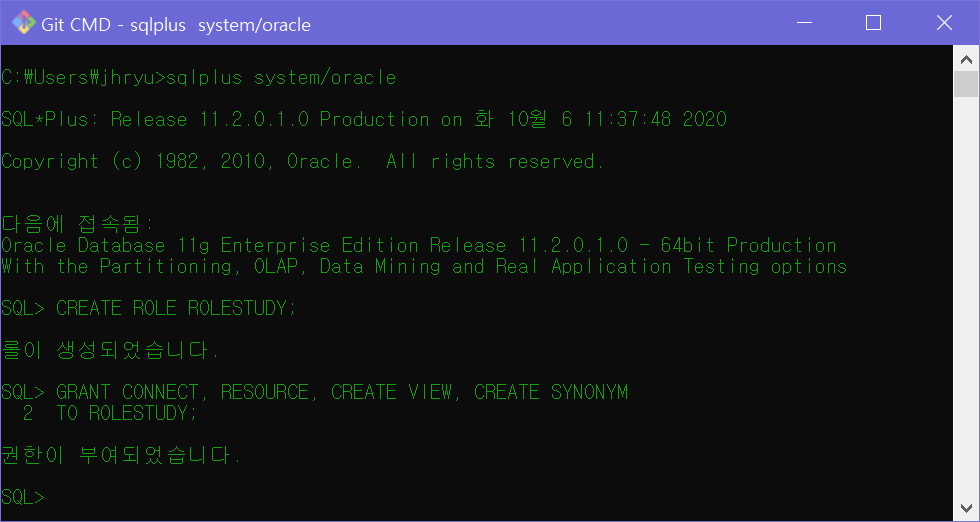

```SQL
--- ORCLSTUDY 사용자에게 롤(ROLESTUDY)부여하기
```
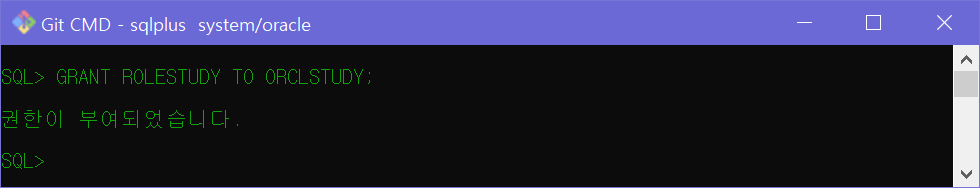

#### (3-2) 부여된 롤과 권한 확인
- ORCLSTUDY 사용자에게 현재 부여된 권한과 롤을 확인하려면  
`USER_SYS_PRIVS`, `USER_ROLE_PRIVS` 데이터 사전을 이용하면 된다.


- 데이터 관리 권한을 가진 계정은 롤을 확인하려면
`DBA_SYS_PRIVS`, `DBA_ROLE_PRIVS`를 사용하면 된다.

```SQL
--- ORCLSTUDY에 부여된 롤과 권한 확인하기
```
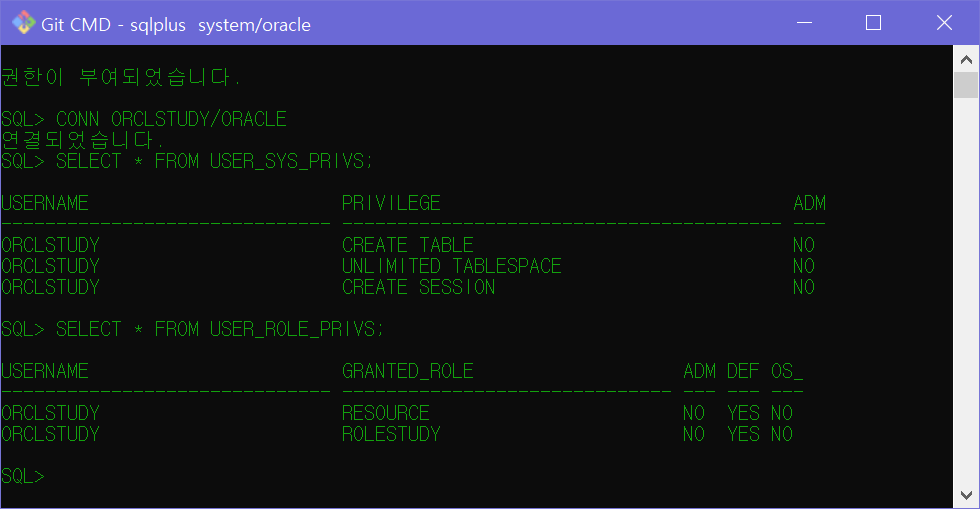

#### (3-3) 부여된 롤취소
- GRANT명령어로 부여한 ROLE을 취소할 때 `REVOKE`문을 사용한다.
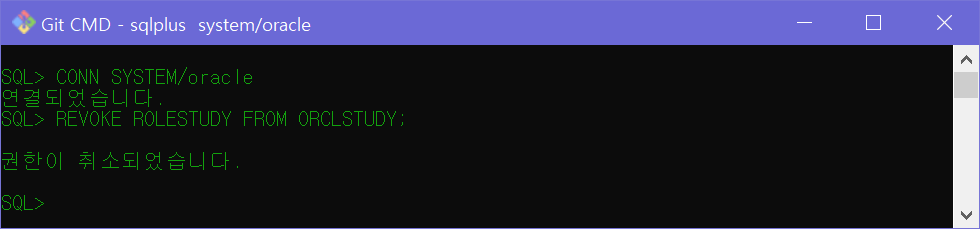

#### (3-4) 롤 삭제
- 롤 삭제는 `DROP`명령어를 사용한다.
- 롤을 삭제하면 해당 롤을 부여받은 모든 사용자의 롤이 (REVOKE)된다.
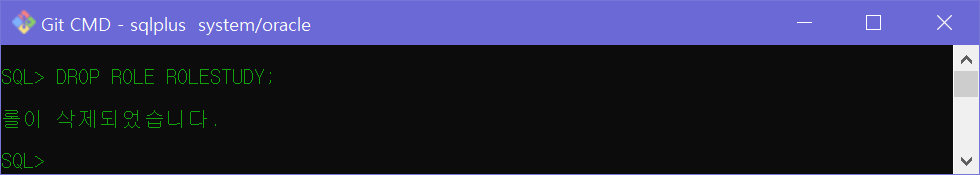